# Governors Image Recognition Project


In [1]:
#import libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./model/test_images/imo_state_gov.jpg')
img.shape

(183, 275, 3)

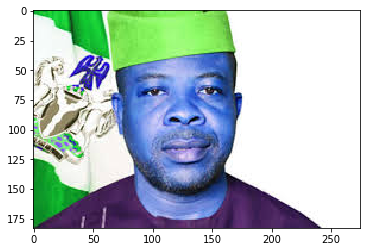

In [3]:
#show image
plt.imshow(img)

#### It's advisable to change color of image to gray for good image detection

In [4]:
#change to gray color
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

array([[107, 120, 128, ..., 255, 255, 255],
       [104, 118, 128, ..., 255, 255, 255],
       [100, 112, 120, ..., 255, 255, 255],
       ...,
       [ 96, 102, 102, ..., 255, 255, 255],
       [ 91,  87,  76, ..., 255, 255, 255],
       [ 83,  68,  49, ..., 255, 255, 255]], dtype=uint8)

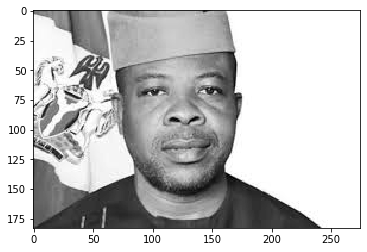

In [5]:
plt.imshow(gray, cmap='gray')

#### Now let's get the face using opencv and haar cascade

In [6]:
#face detection

#get the lbraries required
face_cascade = cv2.CascadeClassifier('./model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../opencv/haarcascades/haarcascade_eye.xml')

#to detct the face of the gray image
faces = face_cascade.detectMultiScale(gray, 1.3, 5) #Detects objects of different sizes in the input image.
faces  #in x, y, width and height

array([[ 73,  33, 103, 103]], dtype=int32)

#### let's draw the face of the image with the aid ofa rectangle

In [7]:
#store the value of the faces
(x,y,w,h)  = faces[0]
x,y,w,h

(73, 33, 103, 103)

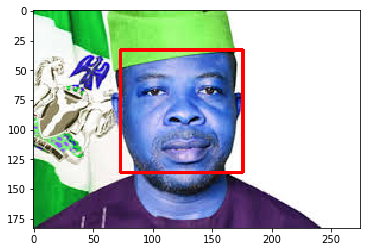

In [8]:
#show the focus of the face
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw a rectangle whose two opposite corners are pt1 and pt2.
plt.imshow(face_img)
#face_img

In [11]:
#testing code
#img3 = cv2.imread('./model/test_images/dapo.jpg')
#img3.shape

In [12]:
#testing code
#eye_cascade = cv2.CascadeClassifier('./model/opencv/haarcascades/haarcascade_eye_tree_eyeglasses.xml')
#eye_cascade2 = cv2.CascadeClassifier('./model/opencv/haarcascades/haarcascade_eye.xml')
#eye3 = eye_cascade2.detectMultiScale(img3)
#eye3

#### let's get the two eyes

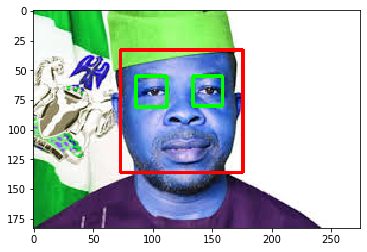

array([[13, 22, 26, 26],
       [61, 22, 25, 25]], dtype=int32)

In [9]:
# detect the two eyes
cv2.destroyAllWindows() #destroys all of the opened HighGUI windows.

#iterate throughthe four faces
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)   #rectangular shape target of the face
    roi_gray = gray[y:y+h, x:x+w]       #get the inner dimension region of interest for the grey image
    roi_color = face_img[y:y+h, x:x+w]  ##get the inner dimension region of interest for the face_img image
    eyes = eye_cascade.detectMultiScale(roi_gray) #Detects objects of different sizes in the input image eye
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) #brief Draws a simple, thick, or filled up-right rectangle

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()
eyes

Taking a closer view

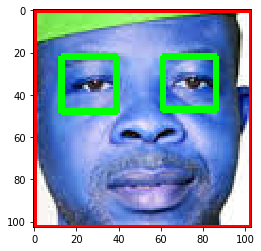

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

Let's write a function to get a clear(crop) view of all images

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    while img is not None:
    #change to gray
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]  #for the grayed image
            roi_color = img[y:y+h, x:x+w]  #for the colored image
            eyes = eye_cascade.detectMultiScale(roi_gray)
            #print(eyes)
            if len(eyes) >= 2:
                return roi_color
        break

       # return 'Eyes were not able to be detected clearly'

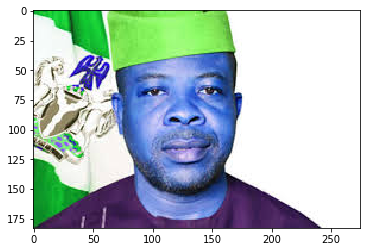

In [12]:
# check original image
original_image = cv2.imread('./model/test_images/imo_state_gov.jpg')
plt.imshow(original_image)

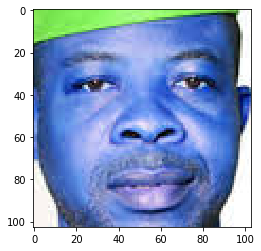

In [13]:
# Now using the function
cropped_image = get_cropped_image_if_2_eyes('./model/test_images/imo_state_gov.jpg')
plt.imshow(cropped_image)

#### Let's check for eyes that are closed or with glasses

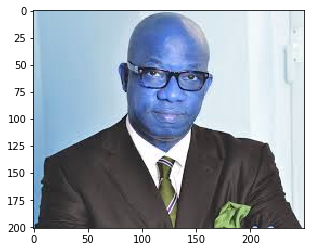

In [14]:
#original image
org_image_obstructed = cv2.imread('./model/test_images/dapo.jpg')
plt.imshow(org_image_obstructed)

In [15]:
#image after being passed through the function
cropped_image_with_glasses = get_cropped_image_if_2_eyes('./model/test_images/dapo.jpg')
cropped_image_with_glasses

 Nothing is returned because the face is obstructed by the eye glass

#### Now let's create a folder for cropped images 

In [16]:
#make the directories
path_to_data = "./model/dataset/"    #for datasset folder
path_to_cr_data = "./model/dataset/cropped/"  #for cropped folder

In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):     #iteratethrogh the given path
    if entry.is_dir():                  #if entry is found in the directory
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./model/dataset/abdulrahmaan_razaq_kwara',
 './model/dataset/aminu_bello_katsina',
 './model/dataset/dapo_abiodun_ogun',
 './model/dataset/gboyega_oyetola _osun',
 './model/dataset/godwin_obaseki_edo',
 './model/dataset/governor of akwa ibom state',
 './model/dataset/governor of cross river',
 './model/dataset/governor of ebonyi state',
 './model/dataset/governor of zamfara',
 './model/dataset/hope_uzodinma_imo',
 './model/dataset/kayode_fayemi_ekiti',
 './model/dataset/okeazu_ipeazu_abia',
 './model/dataset/rotimi_akeredolu_ondo',
 './model/dataset/samuel_ortom_benue',
 './model/dataset/sani_bello_niger',
 './model/dataset/sanwolu_lag',
 './model/dataset/seyi_makinde_oyo',
 './model/dataset/umar_ganduje_kano',
 './model/dataset/wike_rivers',
 './model/dataset/yahaya_bello_kogi']

In [19]:
#create the cropped folder
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)  #remove cropped folder if it exists.

os.mkdir(path_to_cr_data) #make cropped folder if it doesn't exist

#### Let's create a folder for each governor and add the respective cropped images to the folder

In [20]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

#iterate to get the name sof the celebrities
for img_dir in img_dirs:
    print(img_dir)
    name_of_governor = img_dir.split('/')[-1]
    print(name_of_governor)

./model/dataset/abdulrahmaan_razaq_kwara
abdulrahmaan_razaq_kwara
./model/dataset/aminu_bello_katsina
aminu_bello_katsina
./model/dataset/dapo_abiodun_ogun
dapo_abiodun_ogun
./model/dataset/gboyega_oyetola _osun
gboyega_oyetola _osun
./model/dataset/godwin_obaseki_edo
godwin_obaseki_edo
./model/dataset/governor of akwa ibom state
governor of akwa ibom state
./model/dataset/governor of cross river
governor of cross river
./model/dataset/governor of ebonyi state
governor of ebonyi state
./model/dataset/governor of zamfara
governor of zamfara
./model/dataset/hope_uzodinma_imo
hope_uzodinma_imo
./model/dataset/kayode_fayemi_ekiti
kayode_fayemi_ekiti
./model/dataset/okeazu_ipeazu_abia
okeazu_ipeazu_abia
./model/dataset/rotimi_akeredolu_ondo
rotimi_akeredolu_ondo
./model/dataset/samuel_ortom_benue
samuel_ortom_benue
./model/dataset/sani_bello_niger
sani_bello_niger
./model/dataset/sanwolu_lag
sanwolu_lag
./model/dataset/seyi_makinde_oyo
seyi_makinde_oyo
./model/dataset/umar_ganduje_kano
umar

In [21]:
cropped_image_dirs = []
governor_file_names_dict = {}

#iterate to get the name sof the celebrities
for img_dir in img_dirs:
    #print(img_dir)
    count = 0                #initialize count variable
    governor_name = img_dir.split('/')[-1]
    print(governor_name)
    
    governor_file_names_dict[governor_name] = []     #create an empty list for the cropped_file_name
    
    #get the images with two eyes in the img_dir
    for entry in os.scandir(img_dir):
        #print(entry)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        
        #check for empty roi_color and create cropped_folder path for respective celebrity
        if roi_color is not None:
            cropped_folder = path_to_cr_data + governor_name
            
            #iterate through each of the folder and the images
            if not os.path.exists(cropped_folder):  
                #create cropped_folder directory path if it doesn't exist
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            
            #giv names to the respective file
            cropped_file_name = governor_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            #save in opencv
            #count += 1
            cv2.imwrite( cropped_file_path, roi_color)         #Saves an image to a specified file.
            governor_file_names_dict[governor_name].append(cropped_file_path)
            count += 1
            

#cropped_image_dirs

abdulrahmaan_razaq_kwara
Generating cropped images in folder:  ./model/dataset/cropped/abdulrahmaan_razaq_kwara
aminu_bello_katsina
Generating cropped images in folder:  ./model/dataset/cropped/aminu_bello_katsina
dapo_abiodun_ogun
Generating cropped images in folder:  ./model/dataset/cropped/dapo_abiodun_ogun
gboyega_oyetola _osun
Generating cropped images in folder:  ./model/dataset/cropped/gboyega_oyetola _osun
godwin_obaseki_edo
Generating cropped images in folder:  ./model/dataset/cropped/godwin_obaseki_edo
governor of akwa ibom state
Generating cropped images in folder:  ./model/dataset/cropped/governor of akwa ibom state
governor of cross river
Generating cropped images in folder:  ./model/dataset/cropped/governor of cross river
governor of ebonyi state
Generating cropped images in folder:  ./model/dataset/cropped/governor of ebonyi state
governor of zamfara
Generating cropped images in folder:  ./model/dataset/cropped/governor of zamfara
hope_uzodinma_imo
Generating cropped ima

#### Task 4: Data Preprocessing
Here we use feature engineering to select the needed features such as eyes and nose using wavelet transform. Wavelet transform helps us to get the facial features like the eyes, nose, lip etc clearly

In [17]:
#code from stack overflow
#import wavelet transform
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

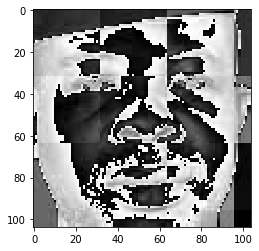

In [18]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [28]:
governor_file_names_dict

{'abdulrahmaan_razaq_kwara': ['./model/dataset/cropped/abdulrahmaan_razaq_kwara/abdulrahmaan_razaq_kwara0.png',
  './model/dataset/cropped/abdulrahmaan_razaq_kwara/abdulrahmaan_razaq_kwara1.png',
  './model/dataset/cropped/abdulrahmaan_razaq_kwara/abdulrahmaan_razaq_kwara2.png',
  './model/dataset/cropped/abdulrahmaan_razaq_kwara/abdulrahmaan_razaq_kwara3.png',
  './model/dataset/cropped/abdulrahmaan_razaq_kwara/abdulrahmaan_razaq_kwara4.png',
  './model/dataset/cropped/abdulrahmaan_razaq_kwara/abdulrahmaan_razaq_kwara5.png',
  './model/dataset/cropped/abdulrahmaan_razaq_kwara/abdulrahmaan_razaq_kwara6.png',
  './model/dataset/cropped/abdulrahmaan_razaq_kwara/abdulrahmaan_razaq_kwara7.png',
  './model/dataset/cropped/abdulrahmaan_razaq_kwara/abdulrahmaan_razaq_kwara8.png',
  './model/dataset/cropped/abdulrahmaan_razaq_kwara/abdulrahmaan_razaq_kwara9.png',
  './model/dataset/cropped/abdulrahmaan_razaq_kwara/abdulrahmaan_razaq_kwara10.png',
  './model/dataset/cropped/abdulrahmaan_razaq_k

Since we have manually deleted some images in the cropped folder, a new dictionary list that contain the cleaned images will be created

In [20]:
import os
# create an empty dict
cleaned_gov_dict = {}
# iterate through the the cropped folder i.e cropped_img_dir 

for img_dir_2 in os.scandir(path_to_cr_data):
    #get the paths of images in each governors folder 
    img_dir_2_path = img_dir_2.path
    #get the names of governors
    name_of_gov = img_dir_2_path.split('/')[-1]
    #print(name_of_gov)
    #create an empty file
    file_list =[]
    
    #get each file in img_dir_2
    for entry in os.scandir(img_dir_2):
        #print(entry.path)
        #append the file into file
        file_list.append(entry.path)
    
    #create the keys and their respective values
    cleaned_gov_dict[name_of_gov] = file_list
    
cleaned_gov_dict 

{'aminu_bello_katsina': ['./model/dataset/cropped/aminu_bello_katsina\\aminu_bello_katsina0.png',
  './model/dataset/cropped/aminu_bello_katsina\\aminu_bello_katsina1.png',
  './model/dataset/cropped/aminu_bello_katsina\\aminu_bello_katsina10.png',
  './model/dataset/cropped/aminu_bello_katsina\\aminu_bello_katsina101.png',
  './model/dataset/cropped/aminu_bello_katsina\\aminu_bello_katsina102.png',
  './model/dataset/cropped/aminu_bello_katsina\\aminu_bello_katsina103.png',
  './model/dataset/cropped/aminu_bello_katsina\\aminu_bello_katsina104.png',
  './model/dataset/cropped/aminu_bello_katsina\\aminu_bello_katsina105.png',
  './model/dataset/cropped/aminu_bello_katsina\\aminu_bello_katsina106.png',
  './model/dataset/cropped/aminu_bello_katsina\\aminu_bello_katsina107.png',
  './model/dataset/cropped/aminu_bello_katsina\\aminu_bello_katsina108.png',
  './model/dataset/cropped/aminu_bello_katsina\\aminu_bello_katsina110.png',
  './model/dataset/cropped/aminu_bello_katsina\\aminu_bell

In [21]:
# get the governors name in numbers
governor_names_dict = {}
count = 0

for governor_name in cleaned_gov_dict.keys():
    governor_names_dict[governor_name] = count
    count = count + 1

governor_names_dict

{'aminu_bello_katsina': 0,
 'governor of akwa ibom state': 1,
 'governor of zamfara': 2,
 'hope_uzodinma_imo': 3,
 'okeazu_ipeazu_abia': 4,
 'samuel_ortom_benue': 5,
 'sani_bello_niger': 6,
 'sanwolu_lag': 7,
 'seyi_makinde_oyo': 8,
 'wike_rivers': 9,
 'yahaya_bello_kogi': 10}

Change all the images in their respective folder to wavelet transform format

In [25]:
X = []
y = []

# itereate through the dictionary
for governor_names, training_files in cleaned_gov_dict.items():
    for training_image in training_files:       
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))    #resive the image to get uniform size
        img_har = w2d(img, 'db1', 5)                   #change image to wavelet transform format
        scalled_img_har = cv2.resize(img_har, (32, 32)) #resize the wavelet transform image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        #scalled_raw_img has rgb color that's why it has 32*32*3, scalled_img_har is black and white
        X.append(combined_img)
        y.append(governor_names_dict[governor_names])

In [26]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [24]:
len(X) # length of all the images

221

In [27]:
len(X[0])  # size of each image

4096

In [28]:
X[0]

array([[254],
       [243],
       [161],
       ...,
       [  1],
       [  1],
       [  1]], dtype=uint8)

In [29]:
# convert to float and reshape
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(221, 4096)

In [30]:
X[0]

array([254., 243., 161., ...,   1.,   1.,   1.])

#### Building Model Using Machine Learning

We first test with SVM

In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [33]:
# split dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [34]:
#Standard scalar was used to scale the dimensions into -1 and +1 uniformly
# pipeline used to create a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc',SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6964285714285714

In [35]:
# check the numbers of X used for testing
len(X_test)

56

In [36]:
# check the classification report
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.12      1.00      0.22         1
           2       1.00      0.57      0.73         7
           3       1.00      0.25      0.40         4
           4       1.00      0.67      0.80         6
           5       0.70      0.78      0.74         9
           6       0.67      0.67      0.67         3
           7       1.00      0.33      0.50         3
           8       0.80      1.00      0.89         4
           9       0.71      0.71      0.71         7
          10       0.00      0.00      0.00         2

    accuracy                           0.70        56
   macro avg       0.71      0.63      0.60        56
weighted avg       0.80      0.70      0.71        56



#### Hyper-parameter tuning using gridsearchCV

In [38]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [39]:
# use different classification method to get the best modelto use

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [40]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will cha

,model,best_score,best_params
0,svm,0.715152,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.569697,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.806061,{'logisticregression__C': 1}


In [41]:
best_estimators

{'svm': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                      decision_function_shape='ovr', degree=3, gamma='auto',
                      kernel='linear', max_iter=-1, probability=True,
                      random_state=None, shrinking=True, tol=0.001,
                      verbose=False))],
          verbose=False), 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, class_weight=None,
                                         criterion='gini', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None,
       

let's get the accuracy on the test data

In [42]:
best_estimators['svm'].score(X_test, y_test)

0.6964285714285714

In [43]:
best_estimators['random_forest'].score(X_test, y_test)

0.5714285714285714

In [44]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8035714285714286

logistic_regression is taken as it gives the best accuracy

In [46]:
# save the best classification model
#best_estimators['logistic_regression']
bst_clf = best_estimators['logistic_regression']

In [49]:
# check the performance of the model using confusion matrix
from sklearn.metrics import confusion_matrix

#get the predicted data
y_pred = bst_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  5,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  5,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  2,  0,  1],
       [ 0,  1,  0,  0,  1,  0,  1,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2]], dtype=int64)

Text(69.0, 0.5, 'True value')

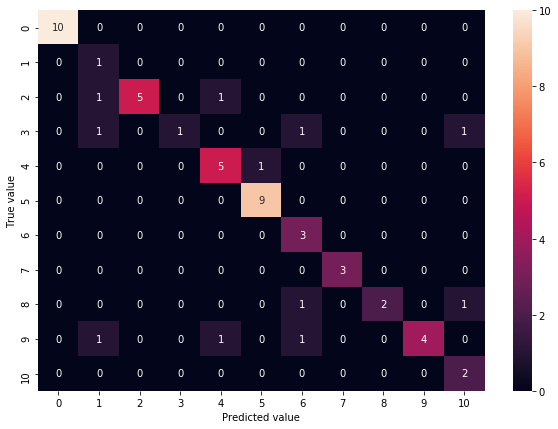

In [51]:
# plot for better visualizing using seaborn
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted value')
plt.ylabel('True value')

From the confusion matrix plot: It predicted correctly 10 times for aminu_bello_katsina(0), it predicted correctly ones for governor og akwa ibom(1) with false prediction of governor of zamfara(2) and hope_uzodinma_imo(3). It predicted 5 times correctly for governor of zamfara(2) etc...

In [52]:
governor_names_dict

{'aminu_bello_katsina': 0,
 'governor of akwa ibom state': 1,
 'governor of zamfara': 2,
 'hope_uzodinma_imo': 3,
 'okeazu_ipeazu_abia': 4,
 'samuel_ortom_benue': 5,
 'sani_bello_niger': 6,
 'sanwolu_lag': 7,
 'seyi_makinde_oyo': 8,
 'wike_rivers': 9,
 'yahaya_bello_kogi': 10}

#### Save trained model

In [55]:
import joblib

#save the model as a pickled file
joblib.dump(bst_clf, 'saved_model.pickle')

['saved_model.pickle']

In [58]:
#save the governor_names_dict for the flask server
import json
with open('gov_names_dict.json', 'w') as f:
    f.write(json.dumps(governor_names_dict))